In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('ADANIPORTS.csv')

In [ ]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,11/27/2007,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15
1,11/28/2007,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14
2,11/29/2007,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14
3,11/30/2007,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14
4,12/3/2007,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape

(3322, 12)

In [ ]:
dataset.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14


In [ ]:
dataset.isnull().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3322 non-null   datetime64[ns]
 1   Symbol      3322 non-null   object        
 2   Series      3322 non-null   object        
 3   Prev Close  3322 non-null   float64       
 4   Open        3322 non-null   float64       
 5   High        3322 non-null   float64       
 6   Low         3322 non-null   float64       
 7   Last        3322 non-null   float64       
 8   Close       3322 non-null   float64       
 9   VWAP        3322 non-null   float64       
 10  Volume      3322 non-null   int64         
 11  Turnover    3322 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 311.6+ KB


In [ ]:
dataset.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415860e+11
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817652e+13
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836045e+13
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158525e+14
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160990e+15


<Axes: >

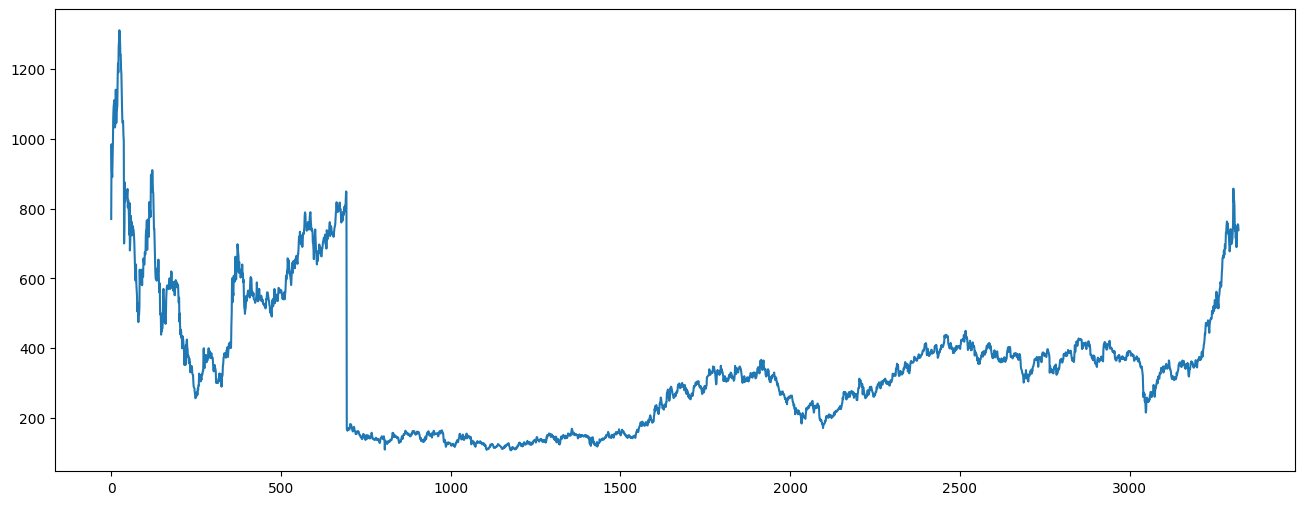

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [ ]:
X_train.shape

(2491, 4)

In [ ]:
X_test.shape

(831, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-4.88494293e-01  7.50135470e-01  7.34736755e-01  1.32215535e-07]


In [ ]:
print(regressor.intercept_)

0.4935024347287822


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(regressor.intercept_)

0.4935024347287822


In [ ]:
print(X_test)


        Open    High     Low   Volume
1182  117.50  117.50  114.20   373291
1396  150.05  153.90  149.50  1328772
1773  348.00  349.45  340.90  2928237
2057  236.45  243.20  235.75  4606790
2520  428.00  435.50  424.50  2734628
...      ...     ...     ...      ...
346   402.00  427.80  402.00   634433
995   127.35  131.00  124.40   535841
2481  388.15  389.25  379.05  5100915
2808  383.00  386.00  377.50  1825681
1679  289.10  292.90  286.40  5686505

[831 rows x 4 columns]


In [ ]:
predicted.shape

(831,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
print(dfr)

      Actual   Predicted
1182  116.60  115.192633
1396  151.85  152.659612
1773  345.15  343.491247
2057  241.95  241.245252
2520  428.85  430.359255
...      ...         ...
346   410.55  420.474808
995   127.30  128.023600
2481  388.85  382.051061
2808  379.70  380.556988
1679  289.30  290.164932

[831 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual,Predicted
1182,116.60,115.192633
1396,151.85,152.659612
1773,345.15,343.491247
2057,241.95,241.245252
2520,428.85,430.359255
1359,154.65,156.210527
118,884.40,886.225167
3029,358.40,358.693339
3063,270.50,268.191864
751,151.45,152.040718


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9993245410610433

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 2.804412136117073


In [ ]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))


Mean Squared  Error: 28.31844891263269


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 5.321508142682175


In [ ]:
graph=dfr.head(20)

<Axes: >

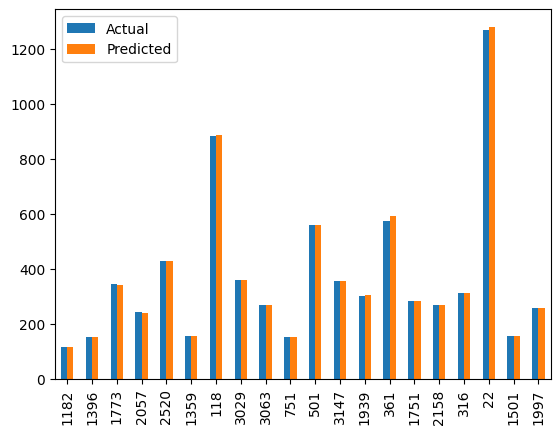

In [ ]:
graph.plot(kind='bar')